## CODECLAUSE - DATA SCIENCE INTERNSHIP
### AUTHOR: Srivarshini S
### TASK-2 :
### MARKET BASKET ANALYSIS IN PYTHON USING APRIORI ALGORITHM

In [1]:
# Importing the required libraries for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Reading the dataset using pandas
market=pd.read_csv(r'C:\Users\vvars\Downloads\MarketBasketAnalysis.csv')

# Viewing the dataset in jupyter notebook
market

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
# Viewing the 1st ten rows of the dataset
market.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [4]:
# Viewing the last five rows in default 
market.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [5]:
# Viewing the names of the columns and its datatype
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
market.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
market.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

In [8]:
market.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [9]:
# Getting the unique values per column
for i in market.columns:
    print(f"Unique {i}'s count: {market[i].nunique()}")
    print(f"{market[i].unique()}\n")

Unique Member_number's count: 3898
[1808 2552 2300 ... 3607 4587 2417]

Unique Date's count: 728
['21-07-2015' '05-01-2015' '19-09-2015' '12-12-2015' '01-02-2015'
 '14-02-2015' '08-05-2015' '23-12-2015' '20-03-2015' '12-02-2015'
 '24-02-2015' '14-04-2015' '03-09-2015' '30-03-2015' '03-05-2015'
 '02-09-2015' '03-08-2015' '07-07-2015' '08-09-2015' '12-11-2015'
 '18-09-2015' '30-11-2015' '17-07-2015' '12-06-2015' '13-02-2015'
 '14-01-2015' '08-03-2015' '27-01-2015' '22-10-2015' '26-10-2015'
 '08-10-2015' '03-10-2015' '11-04-2015' '21-02-2015' '29-09-2015'
 '09-01-2015' '03-04-2015' '20-04-2015' '04-08-2015' '19-07-2015'
 '06-10-2015' '16-10-2015' '06-06-2015' '26-09-2015' '15-08-2015'
 '21-05-2015' '25-08-2015' '11-03-2015' '05-06-2015' '28-07-2015'
 '05-09-2015' '19-06-2015' '11-10-2015' '16-06-2015' '20-01-2015'
 '15-02-2015' '13-04-2015' '07-02-2015' '02-03-2015' '14-03-2015'
 '22-12-2015' '01-07-2015' '03-11-2015' '12-04-2015' '05-05-2015'
 '12-05-2015' '08-07-2015' '21-09-2015' '10-1

In [10]:
#Finding the no of missing values
market.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
market.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
market.shape

(38765, 3)

In [13]:
# Arranging data in ascending order with Top 10 Item sold
item=market['itemDescription'].value_counts().sort_values(ascending=False)[:10]

In [14]:
item
x_data=item.index.values
y_data=item.values


In [15]:
print(x_data)
print(y_data)

['whole milk' 'other vegetables' 'rolls/buns' 'soda' 'yogurt'
 'root vegetables' 'tropical fruit' 'bottled water' 'sausage'
 'citrus fruit']
[2502 1898 1716 1514 1334 1071 1032  933  924  812]


### VISUALIZING DATA AS BAR PLOT

Text(0.5, 1.0, 'BAR PLOT')

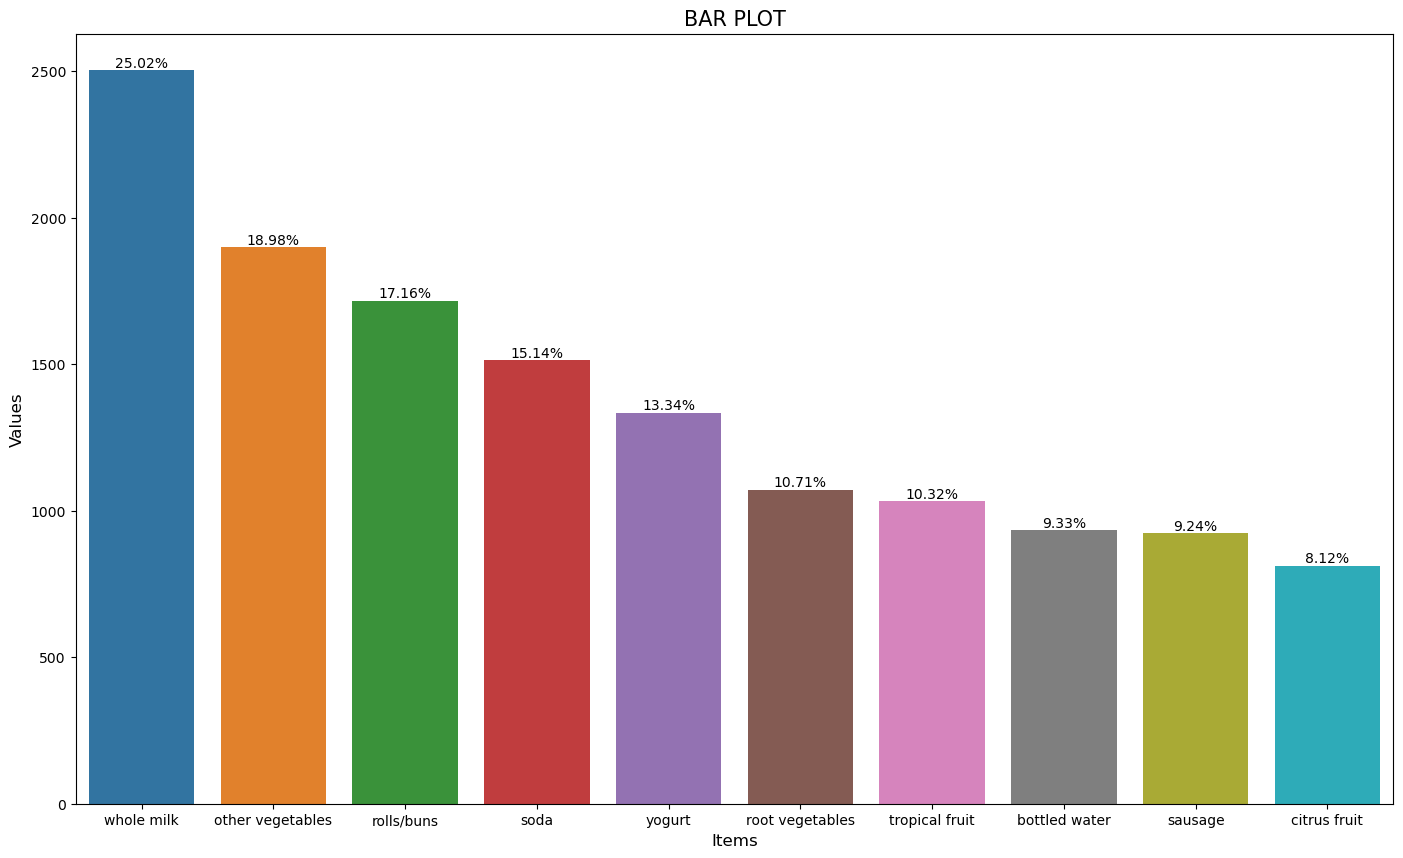

In [16]:
plt.figure(figsize=(17,10))
sns.barplot(x=x_data,y=y_data)
for i, v in enumerate(y_data):
    plt.annotate(f'{v/100}%', (i, v), ha='center', va='bottom')
plt.xlabel('Items',fontsize=12)
plt.ylabel('Values',fontsize=12)
plt.title('BAR PLOT',fontsize=15)

### VISUALIZING DATA AS PIE CHART

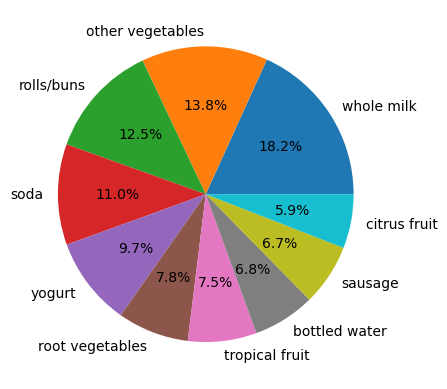

In [17]:
plt.pie(y_data,labels=x_data,autopct='%1.1f%%')
plt.show()

### APRIORI ALGORITHM

In [18]:
market['Quantity']=1

In [19]:
# Making Pivot table and grouping valuable data
trans=market.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
trans

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Replacing NaN values with 0
trans=trans.fillna(0)
trans

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
 # Apriori Algorithm only works on 0 and 1, we are modifying the data which is greater then 1 and less than 0
def encode(x):
    if x<=0:
        return 0
    elif x>0:
        return 1
basket=trans.applymap(encode)

In [22]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
freq=apriori(basket,min_support=0.06,use_colnames=True)
rules=association_rules(freq,metric='lift',min_threshold=1)

C:\Users\vvars\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829


In [25]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
153,"(yogurt, whole milk)",(rolls/buns),0.150590,0.349666,0.065931,0.437819,1.252106,0.013275,1.156805,0.237041
154,"(rolls/buns, whole milk)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,0.015407,1.136802,0.284474
155,(yogurt),"(rolls/buns, whole milk)",0.282966,0.178553,0.065931,0.233001,1.304939,0.015407,1.070988,0.325899
156,(rolls/buns),"(yogurt, whole milk)",0.349666,0.150590,0.065931,0.188555,1.252106,0.013275,1.046786,0.309603
157,(whole milk),"(yogurt, rolls/buns)",0.458184,0.111339,0.065931,0.143897,1.292420,0.014917,1.038030,0.417592


In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
...,...,...,...,...,...,...,...,...,...,...
153,"(yogurt, whole milk)",(rolls/buns),0.150590,0.349666,0.065931,0.437819,1.252106,0.013275,1.156805,0.237041
154,"(rolls/buns, whole milk)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,0.015407,1.136802,0.284474
155,(yogurt),"(rolls/buns, whole milk)",0.282966,0.178553,0.065931,0.233001,1.304939,0.015407,1.070988,0.325899
156,(rolls/buns),"(yogurt, whole milk)",0.349666,0.150590,0.065931,0.188555,1.252106,0.013275,1.046786,0.309603


In [27]:
rules[(rules['confidence']>0.4)&(rules['lift']>1.0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
9,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969,0.181695
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
23,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,0.004994,1.050962,0.089008
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,0.008931,1.090663,0.160404
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
